In [1]:
%load_ext autoreload
%autoreload 2
%reload_ext autoreload

import osmnx as ox
import numpy as np
import pandas as pd
from multiprocessing import Pool,cpu_count
import matplotlib.pyplot as plt
import networkx as nx
import geopandas as gpd
from shapely import wkt
import glob
import time
import random
import sklearn
from sklearn.tree import DecisionTreeRegressor
from lib_garmin_elevation import *

0.052437543869018555


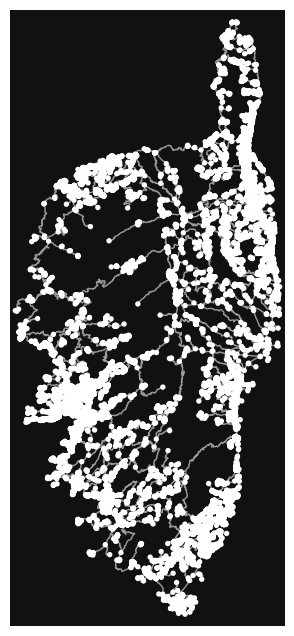

(<Figure size 800x800 with 1 Axes>, <Axes: >)

In [2]:
place_name='Corse, France'
G_osm_dir=ox.graph_from_place(place_name,network_type='drive')
G_osm=to_multi_graph(G_osm_dir)
crs=ox.graph_to_gdfs(G_osm,edges=False).estimate_utm_crs()
G_osm=ox.project_graph(G_osm,to_crs=crs)
t1=time.time()
add_missing_geometries(G_osm)
t2=time.time()
print(t2-t1)

ox.plot_graph(G_osm)


In [3]:
def parallelized_preprocess(file_paths):
    garmin_dfs=[preprocess(file_path,G_osm,crs=crs) for file_path in file_paths]
    return pd.concat(garmin_dfs)

In [4]:
GENERATE=True
navigation_df_path='./navigation_df.csv'
if GENERATE:
    t1=time.time()
    nb_cpu=cpu_count()-1
    file_paths=glob.glob('./garmin_activities/*.gpx')
    chunked_file_paths=chunk(file_paths,nb_cpu)
    with Pool(nb_cpu) as p:
        navigation_dfs=p.map(parallelized_preprocess,chunked_file_paths)
    navigation_df=pd.concat(navigation_dfs)
    navigation_df=navigation_df.to_crs('epsg:4326')
    navigation_df.to_csv(navigation_df_path,index=False)
    navigation_df=navigation_df.to_crs(crs)
    t2=time.time()
    print(t2-t1)
else:
    navigation_df=pd.read_csv(navigation_df_path)
    navigation_df['geometry']=navigation_df['geometry'].apply(wkt.loads)
    navigation_df=gpd.GeoDataFrame(navigation_df,geometry='geometry',crs='epsg:4326')
    navigation_df['time']=pd.to_datetime(navigation_df['time'])
    navigation_df['edge']=navigation_df['edge'].apply(eval)
    navigation_df=navigation_df.to_crs(crs)
navigation_df

reading file took 1.145890 s
estimating crs took 0.027668 s
reading file took 1.326274 s
estimating crs took 0.016340 s
reading file took 1.382572 s
reading file took 1.391689 s
estimating crs took 0.026985 s
estimating crs took 0.040948 s
reading file took 2.393026 s
estimating crs took 0.035147 s
reading file took 3.007191 s
estimating crs took 0.086629 s
reading file took 3.177693 s
estimating crs took 0.041290 s
projecting took  1.885654 s
projecting took  2.192369 s
projecting took  2.078100 s
projecting took  2.196964 s
adding segments took 0.245764 s
adding segments took 0.345713 s
reading file took 0.108839 s
adding segments took 0.248345 s
estimating crs took 0.020898 s
adding segments took 0.609012 s
reading file took 0.373891 s
estimating crs took 0.016752 s
projecting took  0.572397 s
reading file took 0.973213 s
estimating crs took 0.021435 s
adding segments took 0.313575 s
reading file took 0.908336 s
estimating crs took 0.016975 s
projecting took  1.974805 s
projecting t

,file_path,geometry,elevation,time,edge,edge_coordinate,pre_segment,orientation,segment
0,./garmin_activities/activity_12322559591.gpx,POINT (482452.154 4710449.517),8.200000,2023-09-05 13:57:31+00:00,"(51319395, 9064150112, 0)",406.639341,0,1.0,0
1,./garmin_activities/activity_12322559591.gpx,POINT (482455.064 4710445.288),30.200001,2023-09-05 13:57:32+00:00,"(51319395, 9064150112, 0)",411.773043,0,1.0,0
2,./garmin_activities/activity_12322559591.gpx,POINT (482458.498 4710440.297),32.400002,2023-09-05 13:57:33+00:00,"(51319395, 9064150112, 0)",417.831396,0,1.0,0
3,./garmin_activities/activity_12322559591.gpx,POINT (482461.864 4710435.404),33.000000,2023-09-05 13:57:34+00:00,"(51319395, 9064150112, 0)",423.769641,0,1.0,0
4,./garmin_activities/activity_12322559591.gpx,POINT (482464.925 4710430.956),33.400002,2023-09-05 13:57:35+00:00,"(51319395, 9064150112, 0)",429.169124,0,1.0,0
...,...,...,...,...,...,...,...,...,...
14392,./garmin_activities/albin_2.gpx,POINT (482312.549 4710652.407),69.000000,2021-04-01 14:31:34+00:00,"(51319395, 9064150112, 0)",160.359109,44,-1.0,83
14393,./garmin_activities/albin_2.gpx,POINT (482311.203 4710654.365),70.000000,2021-04-01 14:31:35+00:00,"(51319395, 9064150112, 0)",157.983103,44,-1.0,83
14394,./garmin_activities/albin_2.gpx,POINT (482310.766 4710655.000),70.000000,2021-04-01 14:31:36+00:00,"(51319395, 9064150112, 0)",157.212514,44,-1.0,83
14395,./garmin_activities/albin_2.gpx,POINT (482311.316 4710654.200),70.000000,2021-04-01 14:31:37+00:00,"(51319395, 9064150112, 0)",158.183261,44,1.0,84


In [5]:
plt.rcParams['figure.figsize']=(20,20)
t1=time.time()
G_navigation=build_multidigraph(G_osm,navigation_df)
t2=time.time()
print(t2-t1)


5.894855737686157


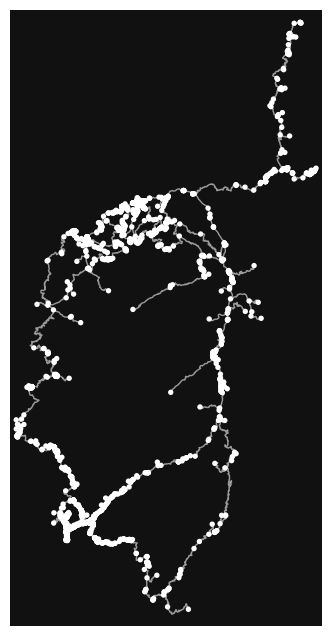

(<Figure size 800x800 with 1 Axes>, <Axes: >)

In [6]:
edges=sorted(navigation_df['edge'].unique(),key=lambda edge:G_osm.get_edge_data(*edge)['length'])
ox.plot_graph(nx.edge_subgraph(G_osm,edges))

0.07658982276916504


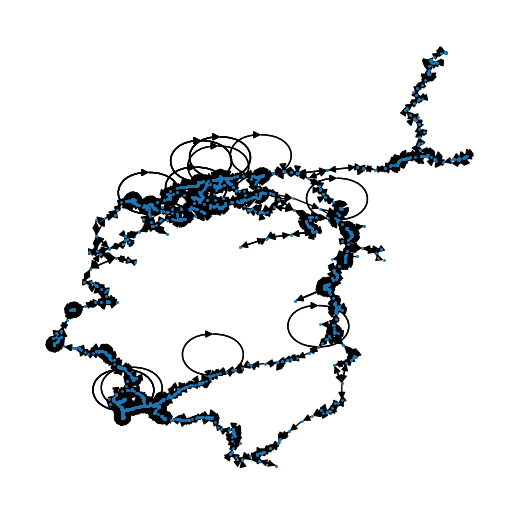

In [7]:
plt.rcParams['figure.figsize']=(5,5)
t1=time.time()
dual_G=build_dual_graph(G_navigation)
t2=time.time()
print(t2-t1)
pos={edge:(G_navigation.nodes()[edge[0]]['x']+G_navigation.nodes()[edge[1]]['x'],G_navigation.nodes()[edge[0]]['y']+G_navigation.nodes()[edge[1]]['y']) for edge in dual_G.nodes()}
nx.draw(dual_G,pos=pos,node_size=1)

0.04970407485961914


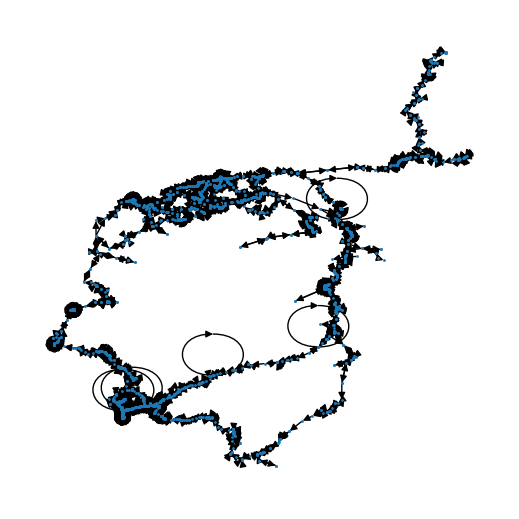

In [8]:
t1=time.time()
dual_tree=build_dual_tree(dual_G)
t2=time.time()
print(t2-t1)
pos={edge:(G_navigation.nodes()[edge[0]]['x']+G_navigation.nodes()[edge[1]]['x'],G_navigation.nodes()[edge[0]]['y']+G_navigation.nodes()[edge[1]]['y']) for edge in dual_G.nodes()}
nx.draw(dual_tree,pos=pos,node_size=1)

In [9]:
t1=time.time()
paths=graph_decomposition(dual_tree)
t2=time.time()
print(t2-t1)
len(paths)

0.6317908763885498


570

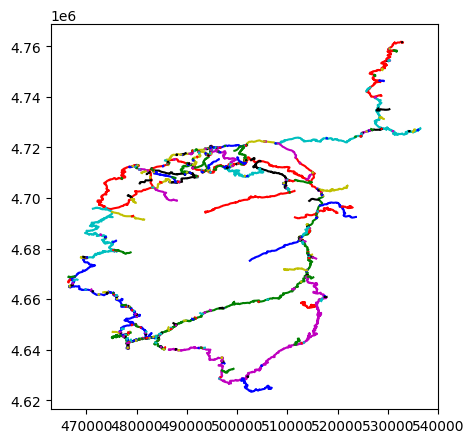

In [10]:
colors=['r','g','b','y','k','m','c']
for k,path in enumerate(paths[:]):
    for edge in path:
        data=G_osm.get_edge_data(*edge)
        if data is None:
            data=G_osm.get_edge_data(edge[1],edge[0],edge[2])
        ls=data['geometry']
        coords=np.array(ls.coords)
        plt.plot(coords[:,0],coords[:,1],c=colors[k%len(colors)])

In [173]:
path=paths[4]
len(path)

35

0.006596565246582031


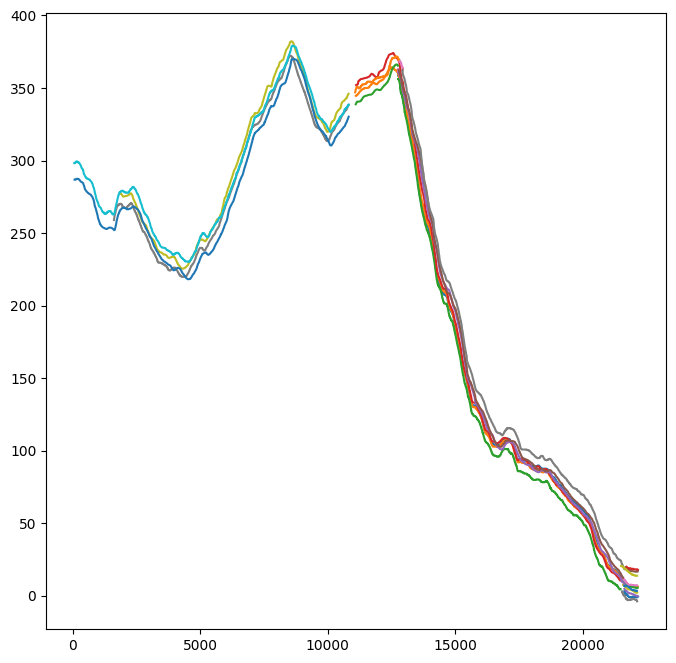

In [174]:
plt.rcParams['figure.figsize']=(8,8)


t1=time.time()
meta_segments,nodes_positions=get_meta_segments_along_path(path,G_navigation,G_osm)
t2=time.time()
print(t2-t1)
for elem in meta_segments:
    X,Y=elem['X'],elem['Y']
    plt.plot(X,Y)



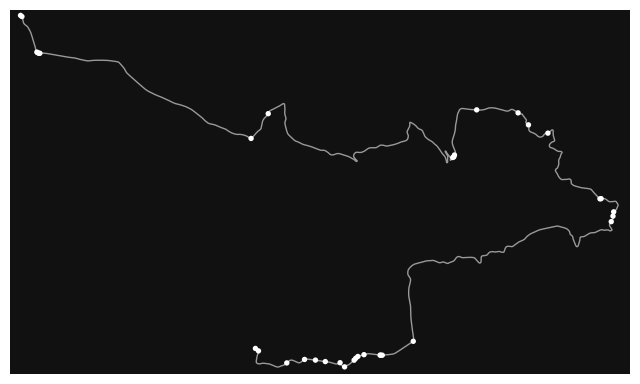

(<Figure size 800x800 with 1 Axes>, <Axes: >)

In [175]:
ox.plot_graph(nx.edge_subgraph(G_osm_dir,map(tuple,path[:])))

0.0594182014465332 1.0338494777679443


/home/pierre/Documents/garmin_elevation_process/lib_garmin_elevation.py:747: RuntimeWarning: All-NaN slice encountered
  median_meta_segment=np.nanmedian(Ys,axis=0)


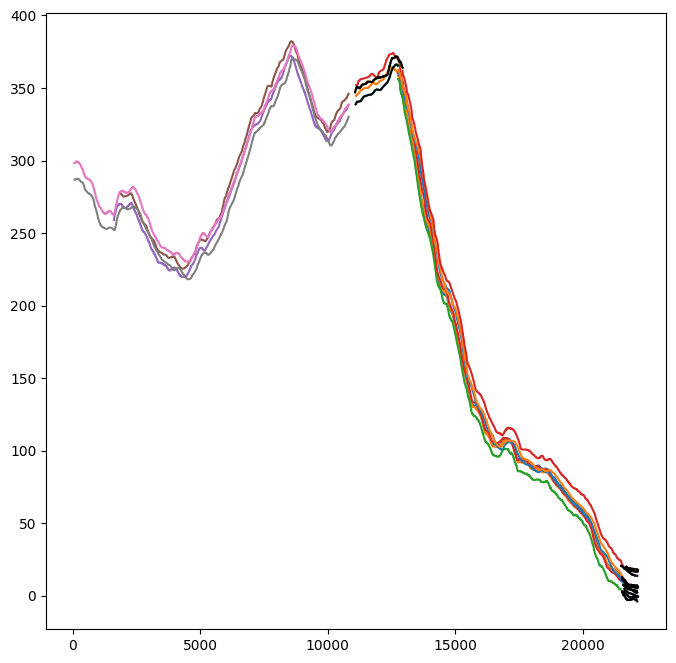

In [176]:
plt.rcParams['figure.figsize']=(8,8)
t1=time.time()
meta_segments=split_meta_segments(meta_segments,max_delta_T=float('inf'))
meta_segments=harmonize_meta_segments(meta_segments)
meta_segments=discard_outliers(meta_segments)
t2=time.time()
pairwise_shifts,affine_meta_segments=get_pairwise_shifts(meta_segments)
t3=time.time()
print(t3-t2,t2-t1)
for meta_segment in meta_segments:
    plt.plot(meta_segment['X'],meta_segment['Y'])
for k in affine_meta_segments:
    meta_segment=meta_segments[k]
    plt.plot(meta_segment['X'],meta_segment['Y'],c='k')    

0.00021696090698242188


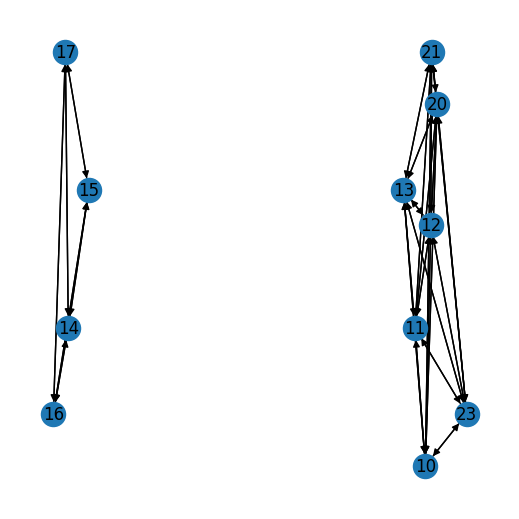

In [177]:
plt.rcParams['figure.figsize']=(5,5)

file_paths=list(np.unique(navigation_df['file_path']))
N=len(meta_segments)
t1=time.time()
shift_G=get_shifts_graph(pairwise_shifts)
t2=time.time()
print(t2-t1)

pos={k:(np.mean(meta_segments[k]['X']),file_paths.index(meta_segments[k]['file_path'])) for k in range(N)} 
nx.draw(shift_G,pos=pos,with_labels=True)

0.0006113052368164062


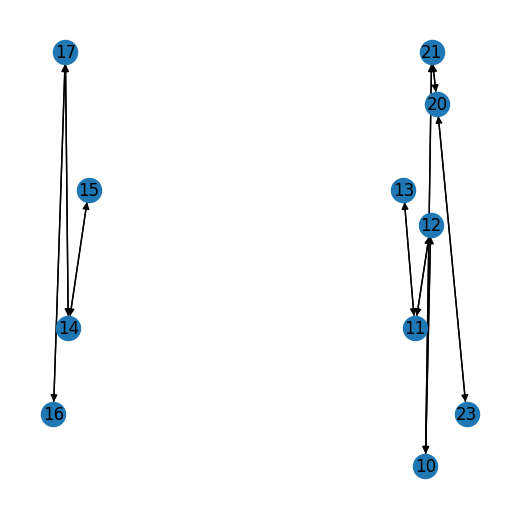

In [178]:
t1=time.time()
tree_edges=list(nx.minimum_spanning_edges(nx.Graph(shift_G),weight='weight',data=False))
tree_edges+=[(v,u) for u,v in tree_edges]
shift_tree=nx.edge_subgraph(shift_G,tree_edges)
t2=time.time()
print(t2-t1)
nx.draw(shift_tree,pos=pos,with_labels=True)

0.0013577938079833984


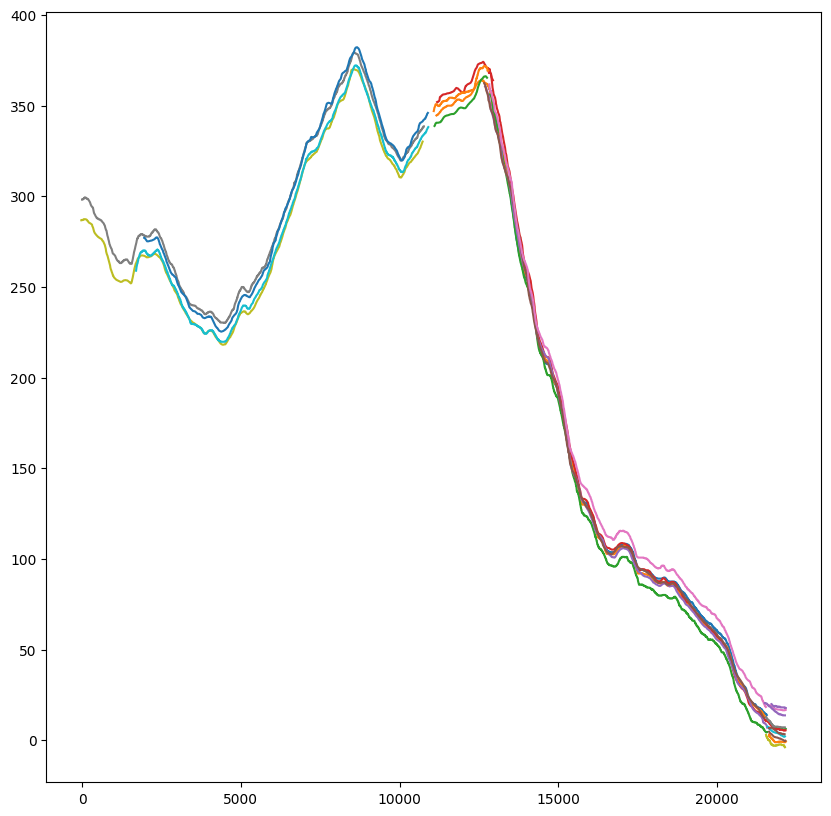

In [179]:
plt.rcParams['figure.figsize']=(10,10)
t1=time.time()
corrected_meta_segments=realign_meta_segments_from_tree(shift_tree,meta_segments)
corrected_meta_segments+=[meta_segments[k] for k in affine_meta_segments]
t2=time.time()
print(t2-t1)
for meta_segment in corrected_meta_segments:
    plt.plot(meta_segment['X'],meta_segment['Y'])



In [180]:
cover,extremities=get_cover(corrected_meta_segments,min_count=2)
len(cover)

2

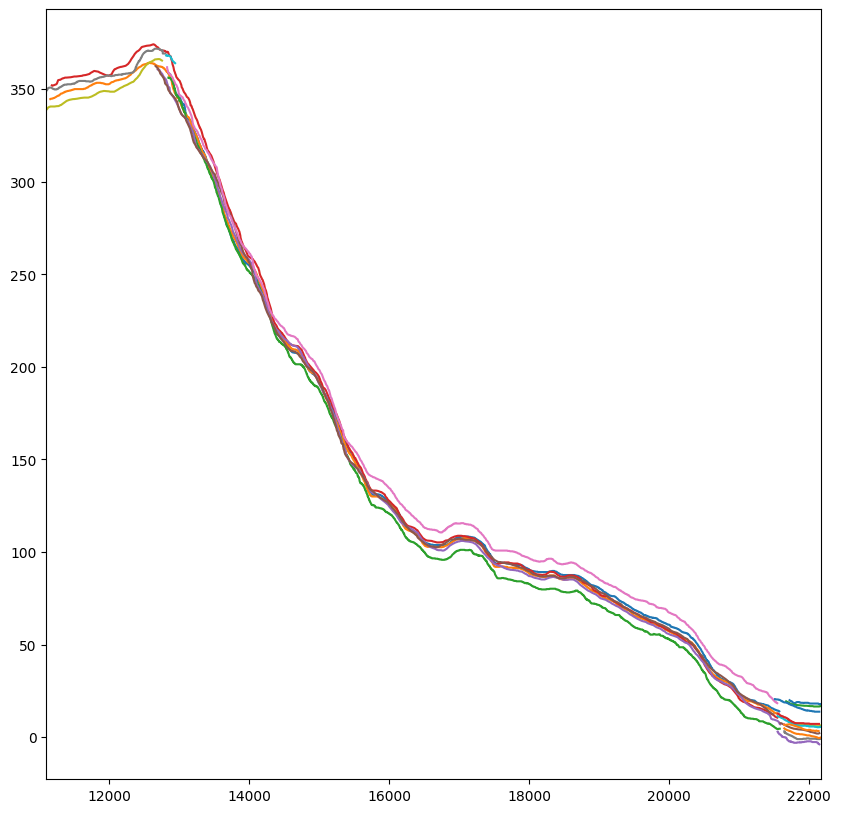

In [189]:
i=1
sub_meta_segments=[corrected_meta_segments[k] for k in cover[i]]
x_min,x_max=extremities[i]
plt.xlim(x_min,x_max)
for meta_segment in sub_meta_segments:
    plt.plot(meta_segment['X'],meta_segment['Y'])    


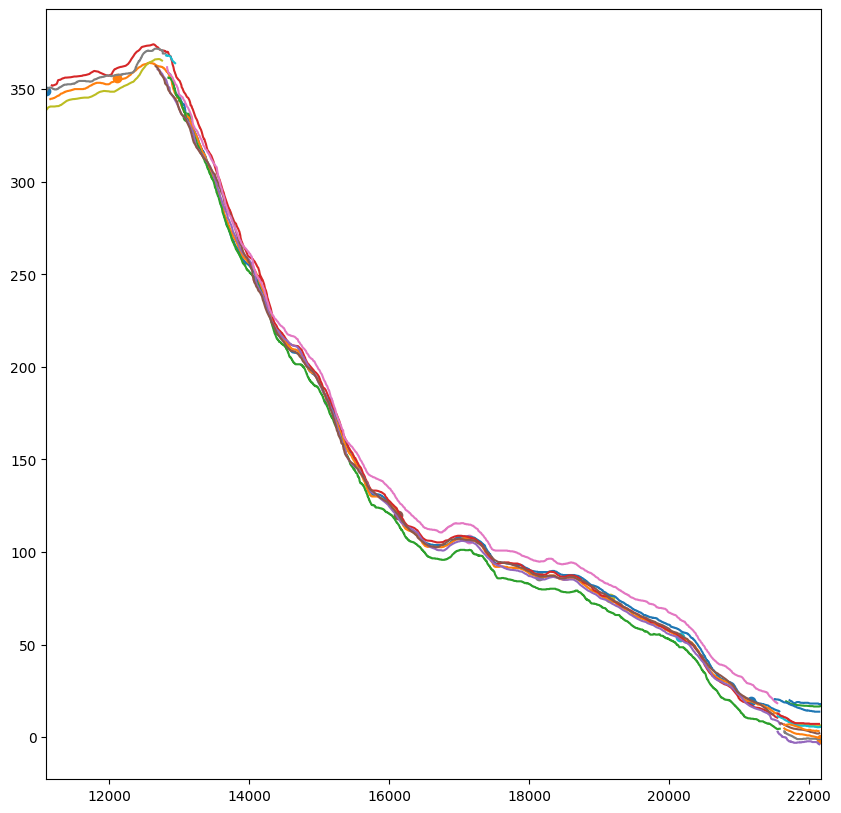

In [190]:
plt.xlim(x_min,x_max)
intermediate_distance=1000
intermediate_points=np.linspace(x_min,x_max,max(round((x_max-x_min)/intermediate_distance)+1,2))
for meta_segment in sub_meta_segments:
    plt.plot(meta_segment['X'],meta_segment['Y']) 
intermediate_elevations=get_intermediate_elevation(intermediate_points,sub_meta_segments)
for k,l in enumerate(intermediate_elevations):
    plt.scatter(intermediate_points[k],np.nanmedian(l))

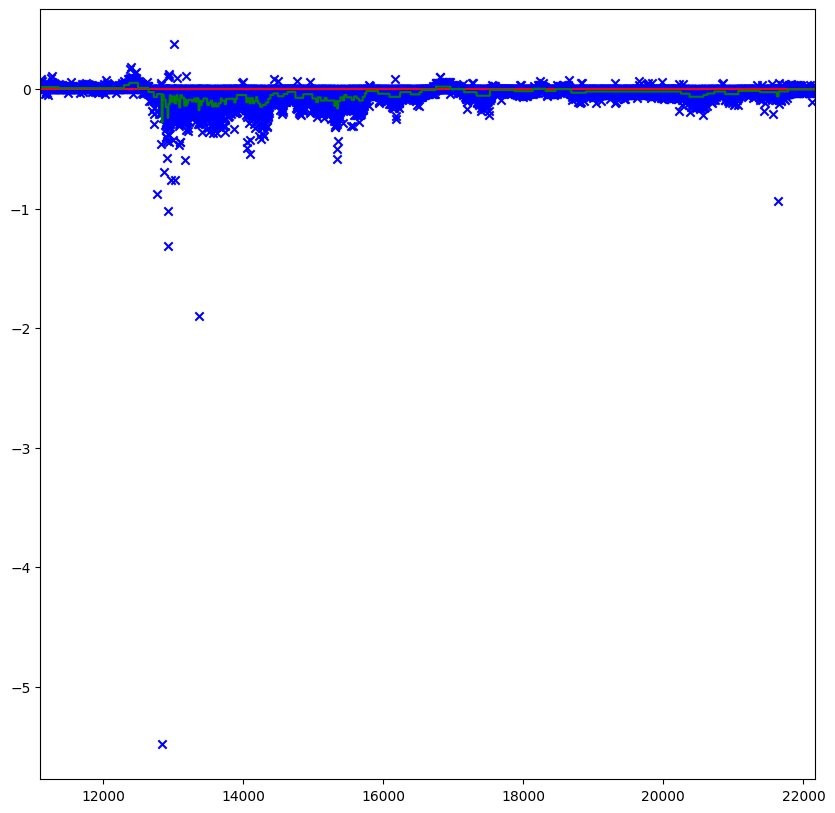

In [191]:
plt.xlim(x_min,x_max)
output=approximate_derivative(sub_meta_segments,x_min=x_min,x_max=x_max,
                                    min_samples_leaf=25,min_impurity_decrease=0.5*float('1e-6'))
if output is not None:
    X,dYdX,model=output
    Z=model.predict(X.reshape(-1,1))
    plt.scatter(X,dYdX,c='b',marker='x')
    plt.plot([0,X[-1]],[0,0],c='r')
    plt.plot(X,Z,c='g')


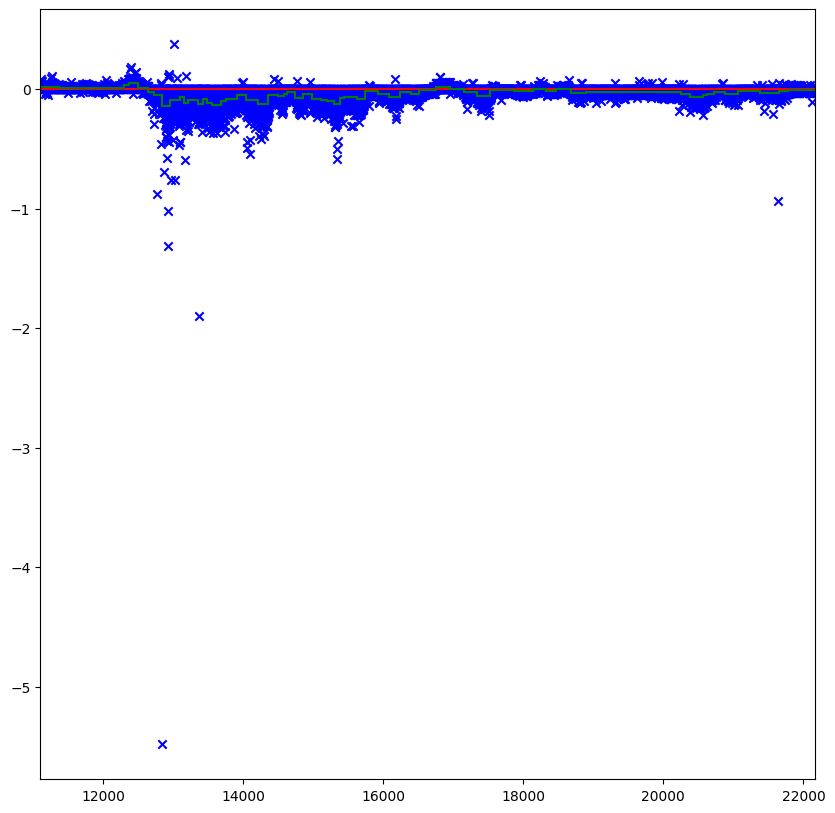

In [192]:
plt.xlim(x_min,x_max)
intervals=simplify_tree(model.tree_,x_min,x_max,min_interval_size=100.)
plt.scatter(X,dYdX,c='b',marker='x')
plt.plot([0,X[-1]],[0,0],c='r')
for x1,x2,v in intervals:
    plt.plot([x1,x2],[v,v],c='g')
for k in range(len(intervals)-1):
    _,x1,v1=intervals[k]
    x2,_,v2=intervals[k+1]
    plt.plot([x1,x2],[v1,v2],c='g')

-12.608701 m elevation difference on a 11.068807 kms long path


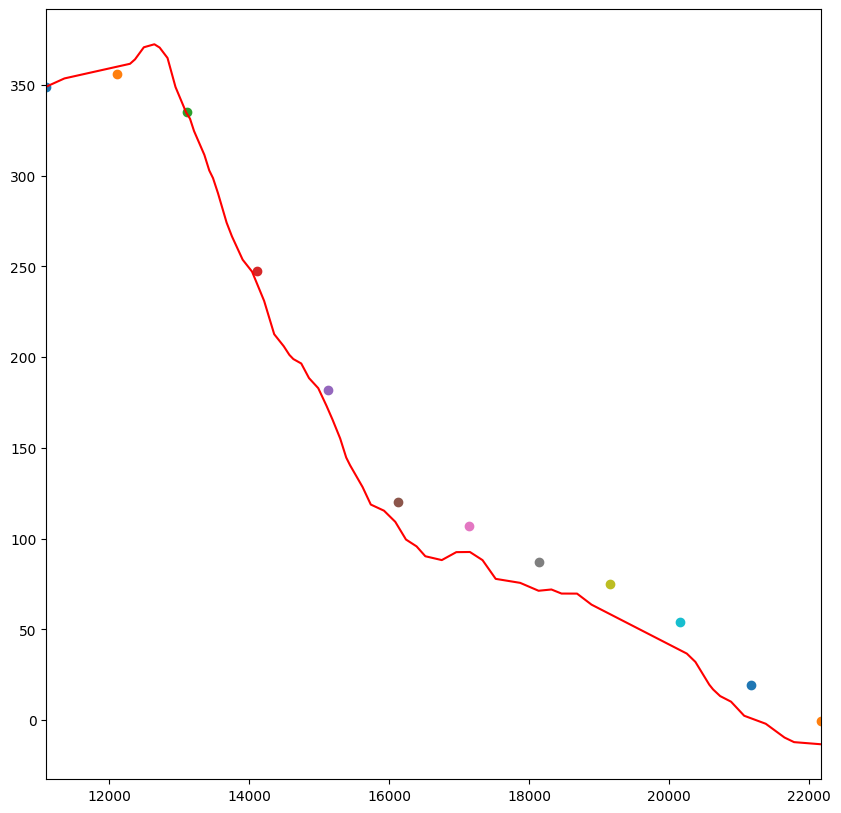

In [193]:
plt.xlim(x_min,x_max)
XX,YY=infer_curve_from_estimated_gradient(intervals,np.nanmedian(intermediate_elevations[0]))

plt.plot(XX,YY,c='r')
for k,l in enumerate(intermediate_elevations):
    plt.scatter(intermediate_points[k],np.nanmedian(l))
print('%f m elevation difference on a %f kms long path'%(YY[-1]-np.nanmedian(intermediate_elevations[-1]),(x_max-x_min)/1000))

total error 33.652087:


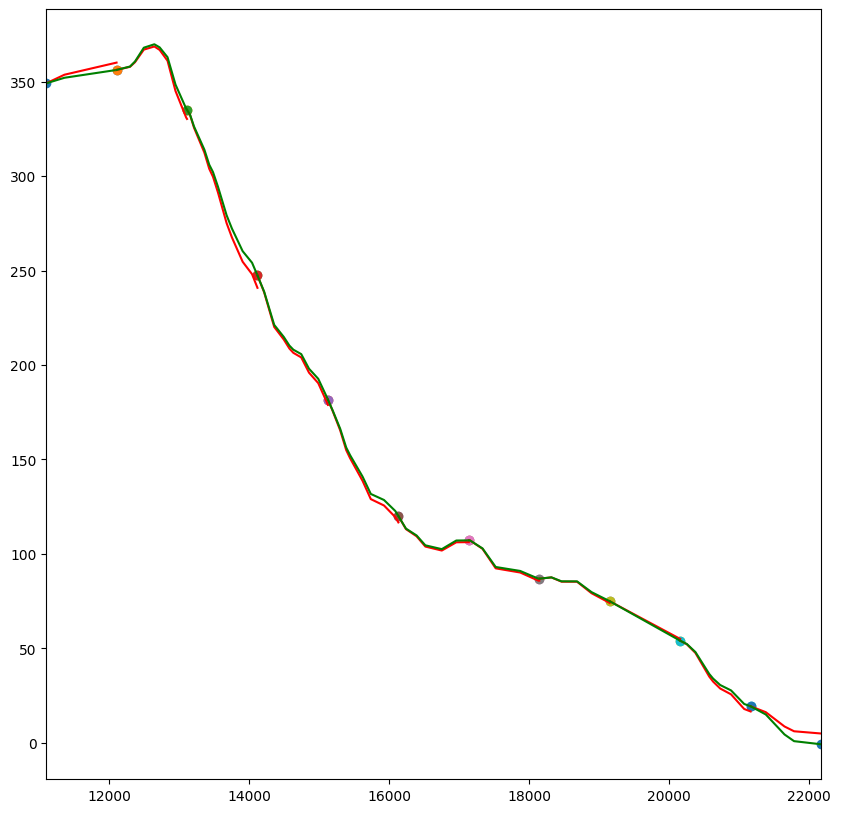

In [194]:
plt.xlim(x_min,x_max)
s=0
for k in range(len(intermediate_points)-1):
    sub_intervals=[[min(max(x1,intermediate_points[k]),intermediate_points[k+1]),min(max(x2,intermediate_points[k]),intermediate_points[k+1]),v] for x1,x2,v in intervals if x2>=intermediate_points[k] and x1<=intermediate_points[k+1]]
    XX,YY=infer_curve_from_estimated_gradient(sub_intervals,np.nanmedian(intermediate_elevations[k]))
    plt.plot(XX,YY,c='r')
    delta_expected=np.nanmedian(intermediate_elevations[k+1])-np.nanmedian(intermediate_elevations[k])
    YY,delta=adjust_curve_elevation(YY,delta_expected)
    s+=abs(delta-delta_expected)
    plt.plot(XX,YY,c='g')

    
    plt.scatter([intermediate_points[k],intermediate_points[k+1]],[np.nanmedian(intermediate_elevations[k]),np.nanmedian(intermediate_elevations[k+1])])
print('total error %f:'%s)

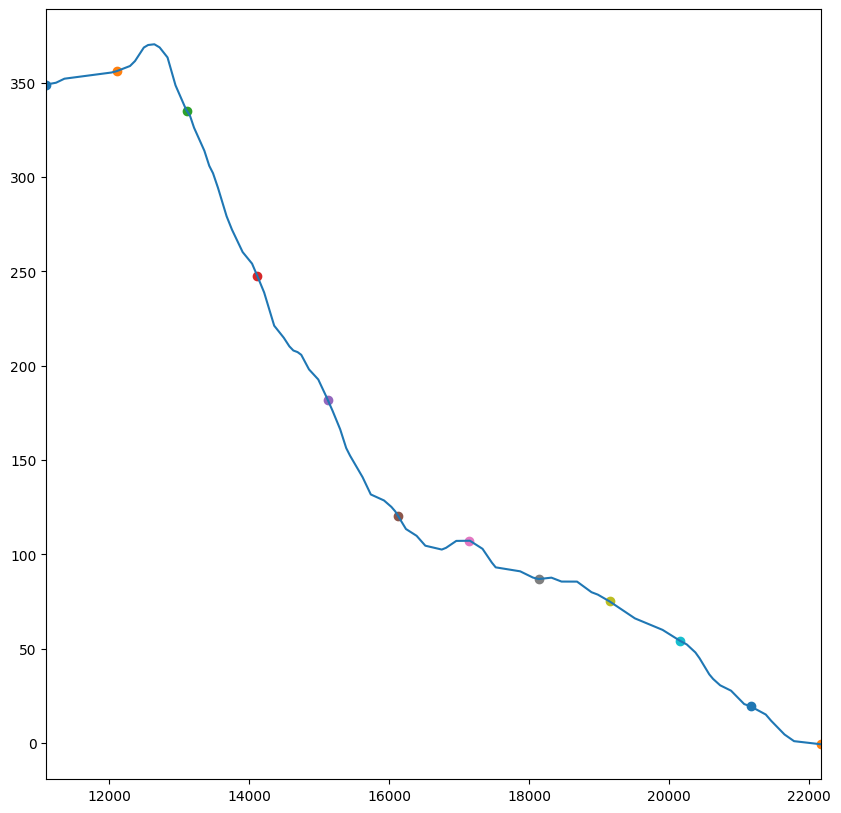

In [195]:
plt.xlim(x_min,x_max)
X,Y=approximate_elevation_profile(sub_meta_segments,x_min,x_max)
X,Y=np.array(X),np.array(Y)
plt.plot(X,Y)
for k,l in enumerate(intermediate_elevations):
    plt.scatter(intermediate_points[k],np.nanmedian(l))
    


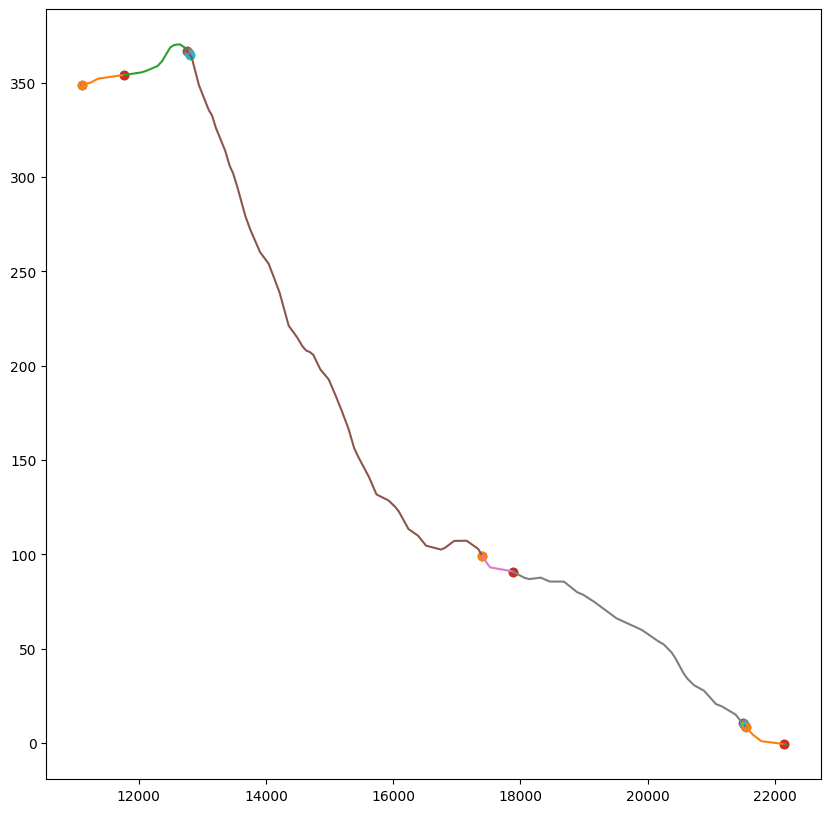

In [196]:
nodes_data,edges_data=collect_elevation_information_from_sub_meta_segments(path,nodes_positions,sub_meta_segments,x_min,x_max)

for k,edge in enumerate(path):
    if edge in edges_data:
        L=edges_data[edge]
        for elem in L:
            plt.plot(nodes_positions[k]+elem['X'],elem['Y'])
    if edge[0] in nodes_data:
        plt.scatter(nodes_positions[k],nodes_data[edge[0]])
    if edge[1] in nodes_data:
        plt.scatter(nodes_positions[k+1],nodes_data[edge[1]])            

